In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/preeeeeeee/PM2.5/data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [3]:
df.drop('No', axis=1, inplace=True)

train, test = df[~df['pm2.5'].isnull()], df[df['pm2.5'].isnull()]

train.shape, test.shape

((41757, 12), (2067, 12))

In [4]:
train.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


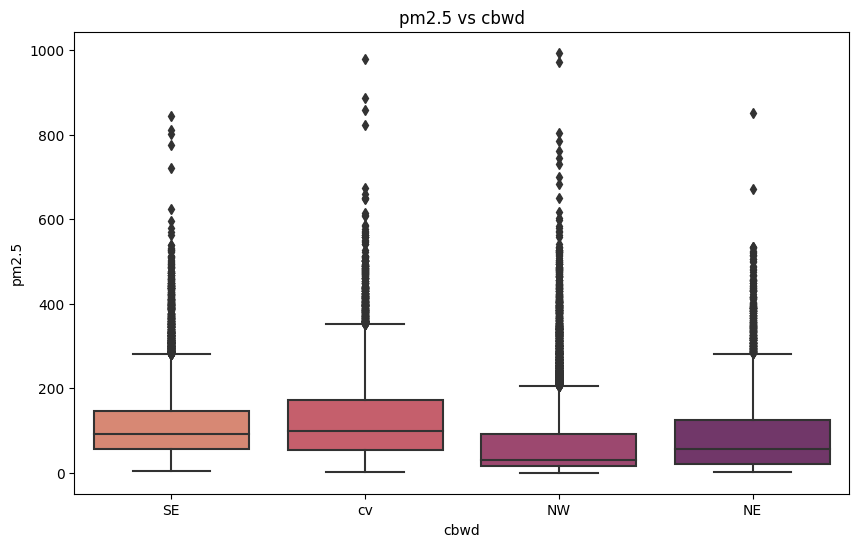

In [5]:
plt.figure(figsize=(10,6))
plt.title('pm2.5 vs cbwd')
sns.boxplot(data=train, x='cbwd', y='pm2.5', palette='flare')
plt.show()

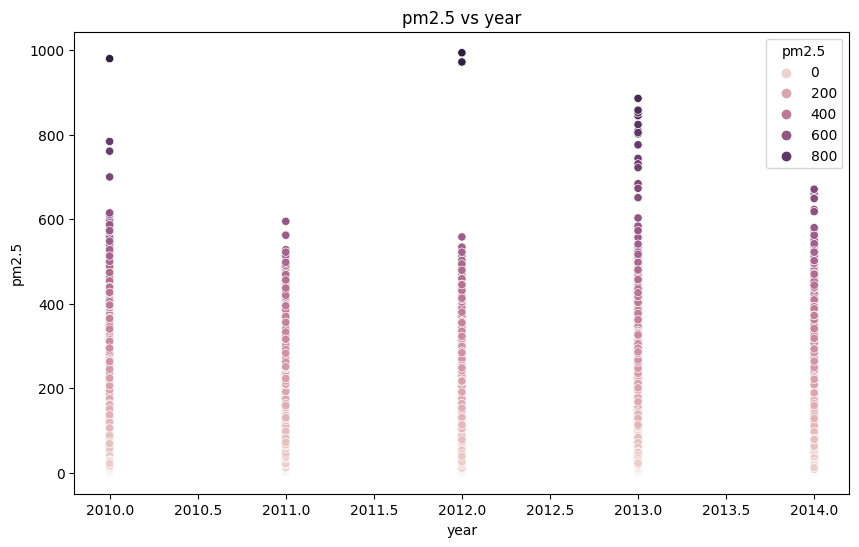

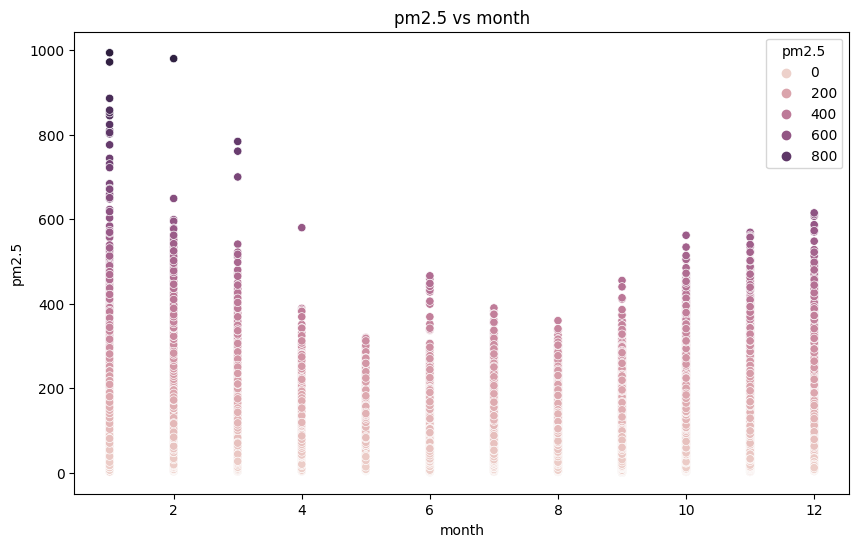

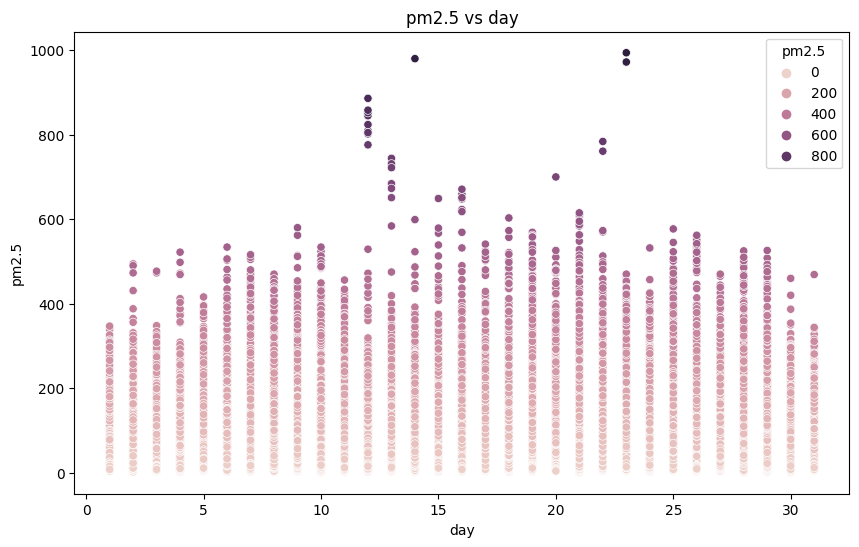

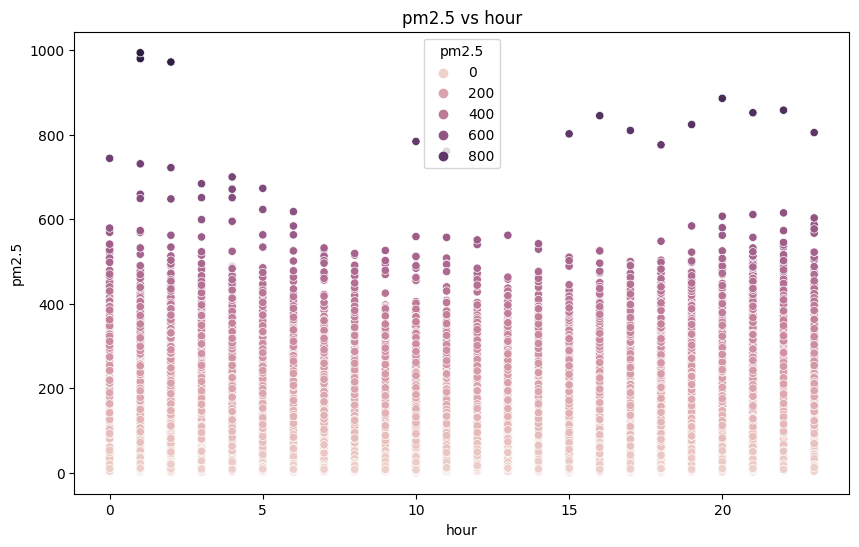

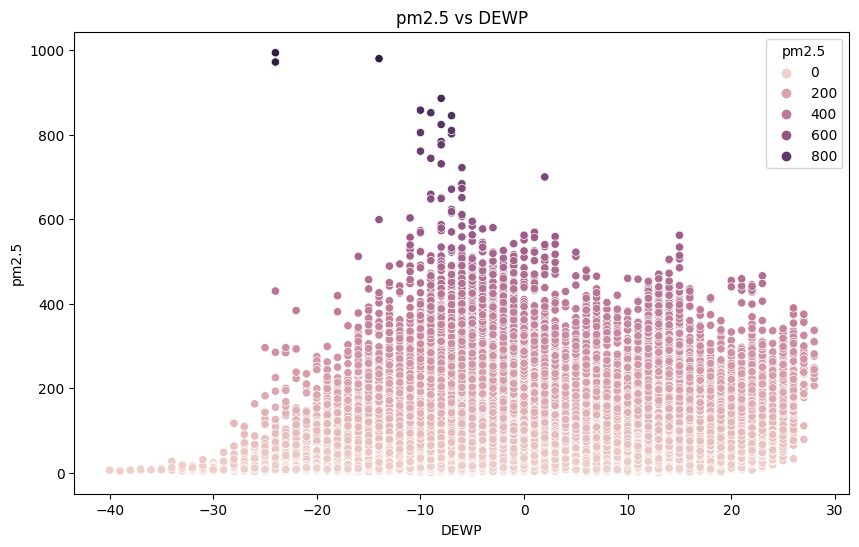

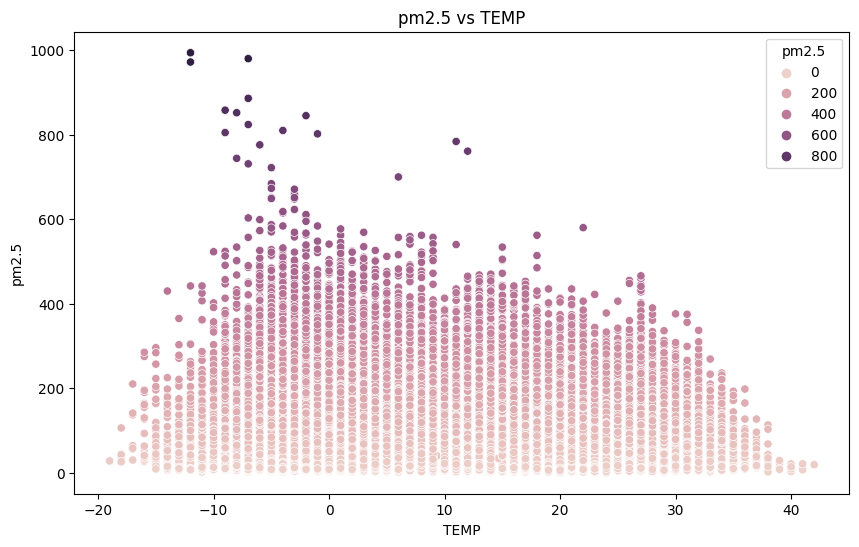

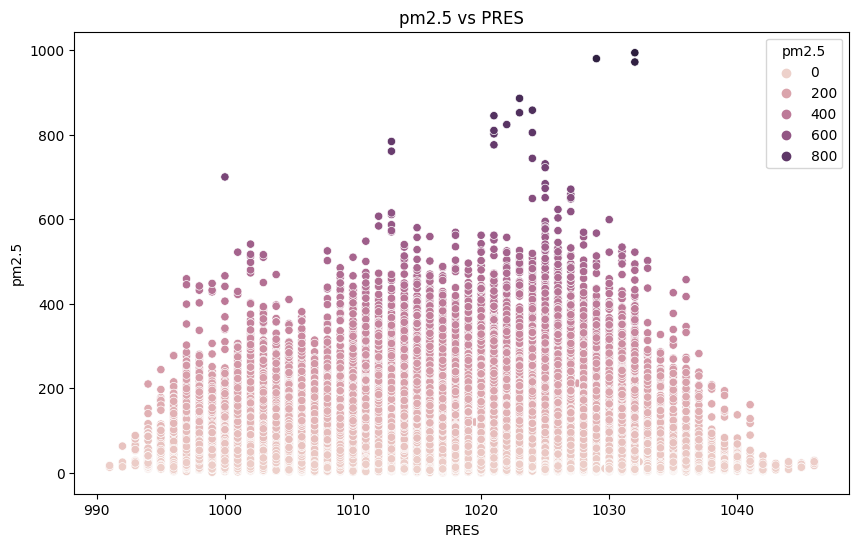

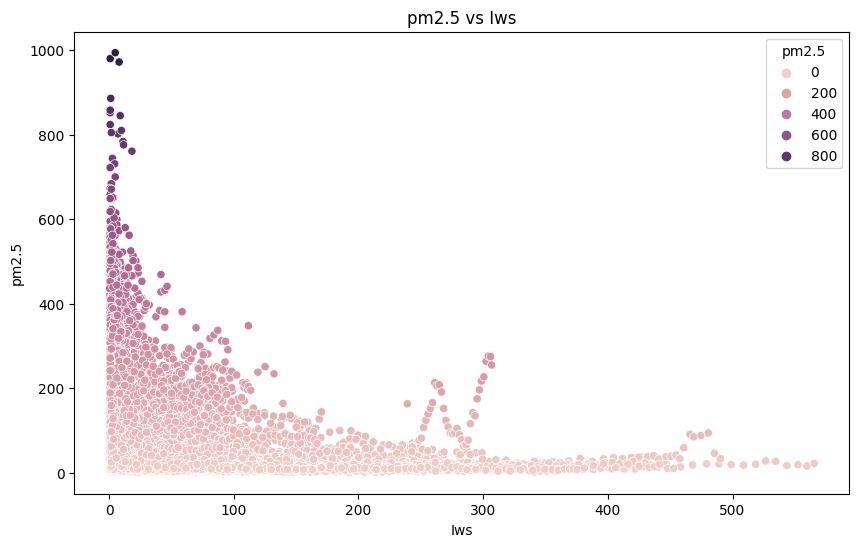

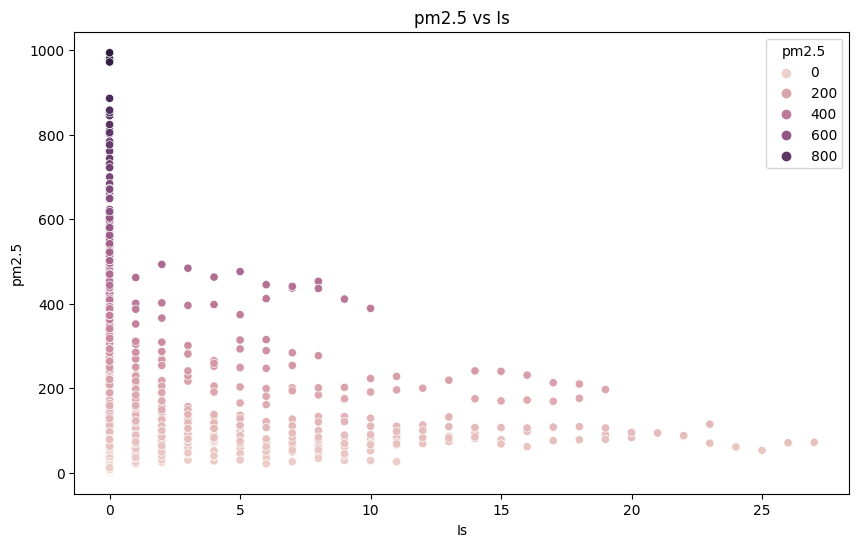

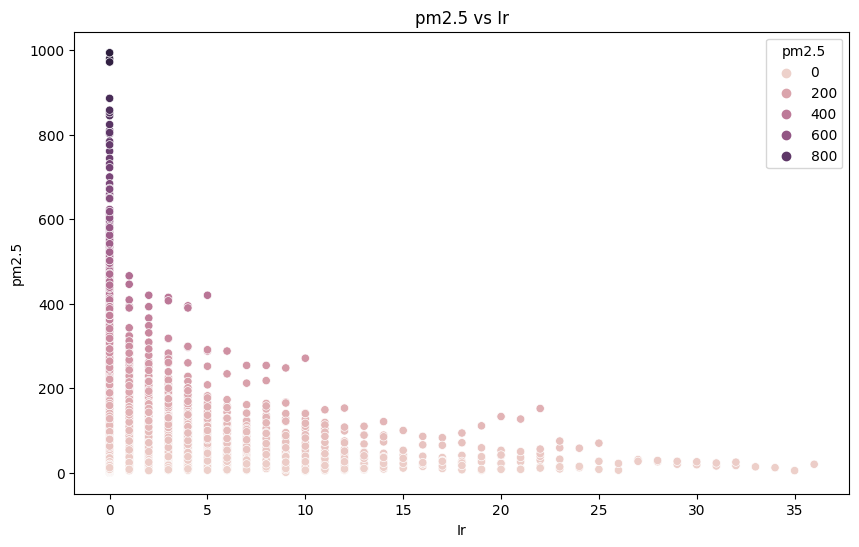

In [6]:
for col in train.drop(['pm2.5', 'cbwd'], axis=1).columns:
    plt.figure(figsize=(10,6))
    plt.title(f'pm2.5 vs {col}')
    sns.scatterplot(train, x=col, y='pm2.5', hue='pm2.5')
    plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['cbwd'] = le.fit_transform(train['cbwd'])
test['cbwd'] = le.transform(test['cbwd'])

train.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0


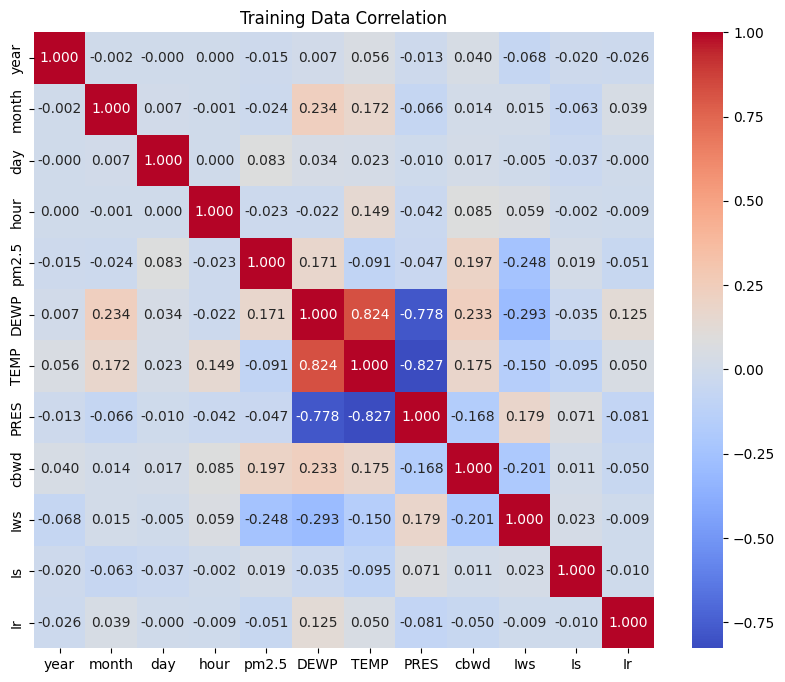

In [8]:
plt.figure(figsize=(10,8))
plt.title('Training Data Correlation')
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

In [9]:
X = train.drop('pm2.5', axis=1)
y = train['pm2.5']

X.shape, y.shape

((41757, 11), (41757,))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=0)

X_train.shape, X_valid.shape

((33405, 11), (8352, 11))

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)

print(f'r2 score : {r2_score(y_valid, preds) * 100:.2f}%')
print(f'MAE score : {mean_absolute_error(y_valid, preds)}')
print(f'MSE score : {mean_squared_error(y_valid, preds)}')

r2 score : 84.77%
MAE score : 22.065063457854407
MSE score : 1257.998929513889


In [12]:
X_test = test.drop('pm2.5', axis=1)

test_preds = model.predict(X_test)

test['pm2.5'] = test_preds

test['cbwd'] = le.inverse_transform(test['cbwd'])

test.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,145.09,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,176.83,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,122.42,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,117.01,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,86.83,-20,-12.0,1018.0,NW,12.97,0,0
